In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,GaussianNoise,Reshape
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [3]:
data=mnist.load_data()

In [14]:
(xtrain,ytrain),(xtest,ytest)=data

In [18]:
xtrain.shape

(60000, 28, 28)

In [21]:
xtrain=xtrain/255
xtest=xtest/255

In [23]:
28*28

784

In [24]:
784/2

392.0

In [68]:
encoder=Sequential()
encoder.add(Flatten(input_shape=(28,28)))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [69]:
decoder=Sequential()
encoder.add(Dense(50,input_shape=[25],activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(784,activation="sigmoid"))
encoder.add(Reshape((28,28)))

In [70]:
model=Sequential([encoder,decoder])
model.compile(loss="binary_crossentropy",optimizer=SGD(1.5),metrics=["accuracy"])
model.fit(xtrain,xtrain,epochs=5,validation_data=(xtest,xtest))

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2552 - accuracy: 0.0831 - val_loss: 0.2218 - val_accuracy: 0.1287
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2052 - accuracy: 0.1375 - val_loss: 0.1903 - val_accuracy: 0.1619
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1752 - accuracy: 0.1736 - val_loss: 0.1591 - val_accuracy: 0.1885
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1562 - accuracy: 0.1990 - val_loss: 0.1508 - val_accuracy: 0.2043
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1473 - accuracy: 0.2123 - val_loss: 0.1428 - val_accuracy: 0.2135


In [71]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_24 (Sequential)  (None, 28, 28)            842009    
                                                                 
 sequential_25 (Sequential)  multiple                  0         
                                                                 
Total params: 842,009
Trainable params: 842,009
Non-trainable params: 0
_________________________________________________________________


In [72]:
predicted_images=model.predict(xtest[:10])

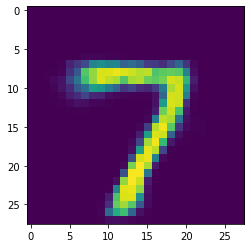

In [81]:
plt.imshow(predicted_images[0])
plt.show()

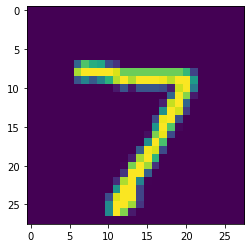

In [80]:
plt.imshow(xtest[0])


In [82]:
noisy_factor=GaussianNoise(0.2)

In [86]:
noisy_iamges=noisy_factor(xtest[:10],training=True)

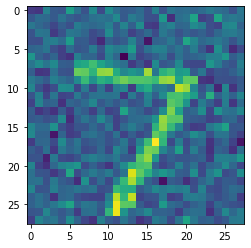

In [87]:
plt.imshow(noisy_iamges[0])


In [90]:
encoder=Sequential()
encoder.add(Flatten(input_shape=(28,28)))
encoder.add(GaussianNoise(0.2)) # double noisy
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [91]:
decoder=Sequential()
encoder.add(Dense(50,input_shape=[25],activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(784,activation="sigmoid"))
encoder.add(Reshape((28,28)))

In [96]:
model=Sequential([encoder,decoder])
model.compile(loss="binary_crossentropy",optimizer=SGD(1.5),metrics=["accuracy"])
model.fit(noisy_iamges,noisy_iamges,epochs=5,validation_data=(xtest,xtest))

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.1072 - accuracy: 0.2143 - val_loss: 0.1395 - val_accuracy: 0.2113
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 0.0692 - accuracy: 0.2536 - val_loss: 0.1558 - val_accuracy: 0.1986
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 0.0639 - accuracy: 0.2929 - val_loss: 0.1868 - val_accuracy: 0.1585
Epoch 4/5
1/1 [==============================] - 1s 1s/step - loss: 0.0801 - accuracy: 0.2536 - val_loss: 0.1855 - val_accuracy: 0.1650
Epoch 5/5
1/1 [==============================] - 1s 1s/step - loss: 0.0364 - accuracy: 0.2964 - val_loss: 0.1894 - val_accuracy: 0.1643


In [97]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_29 (Sequential)  (None, 28, 28)            842009    
                                                                 
 sequential_30 (Sequential)  multiple                  0         
                                                                 
Total params: 842,009
Trainable params: 842,009
Non-trainable params: 0
_________________________________________________________________


In [98]:
predicted_images=model.predict(xtest[:10])

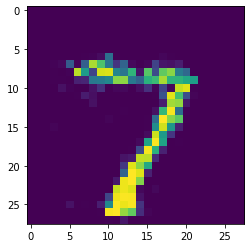

In [99]:
plt.imshow(predicted_images[0])
plt.show()

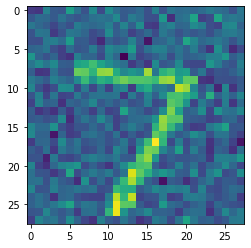

In [101]:
plt.imshow(noisy_iamges[0])
plt.show()

In [102]:
denoised=model(xtest[:10])

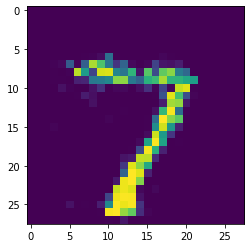

In [103]:
plt.imshow(denoised[0])
plt.show()